In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import math

In [2]:
l=2000
n_power = 0.0
dm_mass = 1 #GeV

In [36]:
s = 0.004
stepsize = [0.5*s,s,2*s]
print(len(stepsize))
print(stepsize)

3
[0.002, 0.004, 0.008]


In [37]:
derivative_cl = []
derivative_norm = []
#derivative_cl_ee = []
#derivative_norm_ee = []

for x in stepsize:
    
    #Center:
    omega_b = 0.0224
    omega_dmeff = 0.12
    h = 0.6730804
    A_s = 2.2e-9
    n_s = 0.96
    tau_reio = 0.07
    sigma_dmeff = 0. 
    
    #Right:
    omega_b_right = 0.0224
    omega_dmeff_right = 0.12 
    h_right = 0.6730804 + x
    A_s_right = 2.2e-9
    n_s_right = 0.96
    tau_reio_right = 0.07
    sigma_dmeff_right = 0. 

    #Left:
    omega_b_left = 0.0224
    omega_dmeff_left = 0.12
    h_left = 0.6730804 - x
    A_s_left = 2.2e-9
    n_s_left = 0.96
    tau_reio_left = 0.07
    sigma_dmeff_left = 0.
    
    params_right = {'output': 'tCl pCl lCl','l_max_scalars': 2500,'lensing': 'yes',
                    'omega_dmeff': omega_dmeff_right,
                    'h': h_right,
                    'omega_b': omega_b_right,
                    'A_s': A_s_right,
                    'n_s': n_s_right,
                    'tau_reio': tau_reio_right,
                    'omega_cdm' :1e-22,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff':sigma_dmeff_right,
                    'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                    'reionization_optical_depth_tol': 1e-07,
                    'perturb_sampling_stepsize':0.01,
                    'k_max_tau0_over_l_max':6,
                    'gauge':'synchronous'}
    params_left = {'output': 'tCl pCl lCl','l_max_scalars': 2500,'lensing': 'yes',
                   'omega_dmeff': omega_dmeff_left,'h': h_left,'omega_b': omega_b_left,'A_s': A_s_left,'n_s': n_s_left,'tau_reio': tau_reio_left,
                   'omega_cdm' :1e-22,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff': sigma_dmeff_left,
                   'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                   'reionization_optical_depth_tol': 1e-07,
                   'perturb_sampling_stepsize':0.01,
                   'k_max_tau0_over_l_max':6,
                   'gauge':'synchronous'}
    
    params_center = {'output': 'tCl pCl lCl','l_max_scalars': 2500,'lensing': 'yes',
                     'omega_dmeff': omega_dmeff,'h': h,'omega_b': omega_b,'A_s': A_s,'n_s': n_s,'tau_reio': tau_reio,
                     'omega_cdm' :1e-22,'m_dmeff': dm_mass,'npow_dmeff': n_power,'sigma_dmeff': sigma_dmeff,
                     'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm':0.71611,
                     'reionization_optical_depth_tol': 1e-07,
                     'perturb_sampling_stepsize':0.01,
                     'k_max_tau0_over_l_max':6,
                     'gauge':'synchronous'}
    
    # Computing Cl_TT for the above parameters in class:
    Mright = Class()
    Mright.set(params_right)
    Mright.compute()
    cl_tot_right = Mright.lensed_cl(2500)
    Mright.struct_cleanup()
    Mright.empty()
    cl_TT_right = cl_tot_right['tt']
    #cl_EE_right = cl_tot_right['ee']
    ell_right = cl_tot_right['ell']

    Mleft = Class()
    Mleft.set(params_left)
    Mleft.compute()
    cl_tot_left = Mleft.lensed_cl(2500)
    Mleft.struct_cleanup()
    Mleft.empty()
    cl_TT_left = cl_tot_left['tt']
    #cl_EE_left = cl_tot_left['ee']
    ell = cl_tot_left['ell']
    
    M = Class()
    M.set(params_center)
    M.compute()
    cl_tot = M.lensed_cl(2500)
    M.struct_cleanup()
    M.empty()
    cl_TT = cl_tot['tt']
    #cl_EE = cl_tot['ee']
    ell = cl_tot['ell']
    
    fiducial_norm = ((cl_TT_right - cl_TT_left) / (x)) /cl_TT
    derivative_norm.append(fiducial_norm)
    
    #fiducial_norm_ee = ((cl_EE_right - cl_EE_left) / (x)) /cl_EE
    #derivative_norm_ee.append(fiducial_norm_ee)
    
    derivative = [(cl_TT_right[l] - cl_TT_left[l]) / (x)]
    derivative_cl.append(derivative)
    
    #derivative_ee = [(cl_EE_right[l] - cl_EE_left[l]) / (x)]
    #derivative_cl_ee.append(derivative_ee)

<ipython-input-37-8dd1daceeb7d>:97: RuntimeWarning: invalid value encountered in true_divide
  fiducial_norm = ((cl_TT_right - cl_TT_left) / (x)) /cl_TT


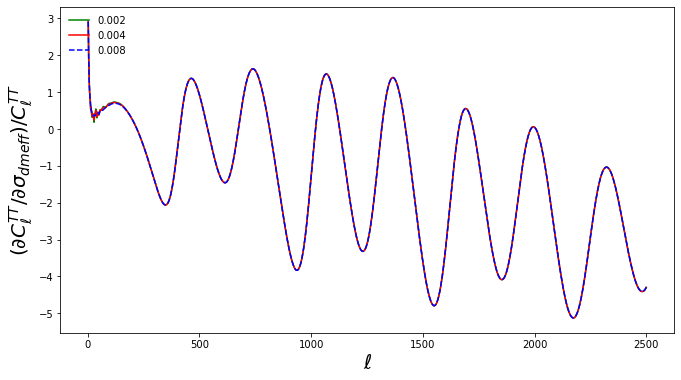

In [38]:
fig, ax = plt.subplots(figsize=(11, 6))

plt.plot(ell, derivative_norm[0],'g-',label=stepsize[0])
plt.plot(ell, derivative_norm[1],'r-',label=stepsize[1])
plt.plot(ell, derivative_norm[2],'b--',label=stepsize[2])
#plt.plot(ell, derivative_norm_ee[0],'g--',label=stepsize[0])
#plt.plot(ell, derivative_norm_ee[1],'r--',label=stepsize[1])
#plt.plot(ell, derivative_norm_ee[2],'b--',label=stepsize[2])
#plt.plot(ell, derivative_norm[3],'k-',label=stepsize[3])
#plt.plot(ell, derivative_norm[4],'-',label=stepsize[4])
#plt.plot(ell, derivative_norm[5],'y-',label=stepsize[5])
#plt.plot(ell, derivative_norm[6],'m-',label=stepsize[6])
#plt.plot(ell, derivative_norm[7],'-',label=stepsize[7])
#plt.plot(ell, derivative_norm[8],'cyan',label=stepsize[8])
#plt.plot(ell, derivative_norm[9],'brown',label=stepsize[9])
#plt.plot(ell, derivative_norm[10],'r-',label=stepsize[10])
#plt.plot(ell, derivative_norm[11],'b-',label=stepsize[11])
#plt.plot(ell, derivative_norm[12],'k-',label=stepsize[12])
#plt.plot(ell, derivative_norm[13],'-',label=stepsize[13])
#plt.plot(ell, derivative_norm[14],'-',label=stepsize[14])
#plt.plot(ell, derivative_norm[15],'-',label=stepsize[15])
#plt.plot(ell, derivative_norm[16],'-',label=stepsize[16])
#plt.plot(ell, derivative_norm[17],'-',label=stepsize[17])
#plt.plot(ell, derivative_norm[18],label=stepsize[18])
#plt.plot(ell, derivative_norm[19], label=stepsize[19])

plt.ylabel(r'$(\partial C_{\ell}^{TT} / \partial \sigma_{dmeff}) / C_{\ell}^{TT}$',size=20)
plt.xlabel(r'$\ell$',size=20)
plt.legend(loc='upper left', frameon=False)

plt.show()
#fig.savefig("derivative_vs_stepsize_1Gev_n=2_3.png") 

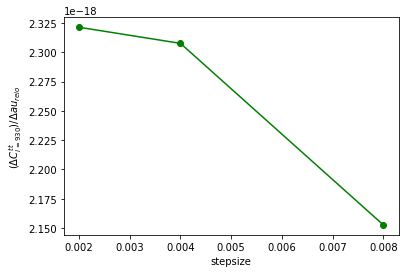

In [39]:
plt.plot(stepsize, derivative_cl,'go-',)
plt.ylabel("$(\Delta C_{l=930}^{tt})/ \Delta \tau_{reio}$")
#plt.ylim([5e-15, 7e-15])
plt.xlabel("stepsize")
#plt.title("$\Delta C_{l=930}$ vs. stepsize for $\tau_{reio} $")
plt.show()
#fig.savefig("convergence-Omega_cdm.png") 


In [40]:
print(derivative_cl)
print(stepsize)

[[2.3213382949589598e-18], [2.3075864792578543e-18], [2.152638657368675e-18]]
[0.002, 0.004, 0.008]


In [41]:
for i in range(len(derivative_cl)-1):
    print(100*np.absolute((derivative_cl[i][0] - derivative_cl[i+1][0])/derivative_cl[i+1][0]))

0.5959393428899028
7.198041406474751


In [42]:
#for i in range(len(derivative_cl_ee)-1):
#    print(100*np.absolute((derivative_cl_ee[i][0] - derivative_cl_ee[i+1][0])/derivative_cl_ee[i+1][0]))

In [ ]:
0.5183313282535272
12.748625811842398